In [6]:
import yaml
with open('config.yaml', 'r') as config:
    cfg = yaml.safe_load(config)

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import category_encoders as ce
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [8]:
df = pd.read_csv(cfg["dataset"])

In [4]:
df.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [9]:
df.columns, df.shape

(Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
        'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
        'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
        'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
        'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
        'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
        'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
        'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
        'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
        'Astronomical_Twilight'],
       dtype='object'),
 (7728394, 46))

In [28]:
df.drop(
    columns=['Zipcode', 'Airport_Code', 'Description', 'ID', 'Description', "Source"],
    inplace=True
)

In [4]:
nan_df = (df.isnull().mean() * 100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)
nan_df.head(10)

,column_name,percentage
7,End_Lat,44.029355
8,End_Lng,44.029355
27,Precipitation(in),28.512858
21,Wind_Chill(F),25.865904
26,Wind_Speed(mph),7.391355
24,Visibility(mi),2.291524
25,Wind_Direction,2.267043
22,Humidity(%),2.253301
28,Weather_Condition,2.244438
20,Temperature(F),2.120143


(0.9999933671345569, 0.9999987660271595)

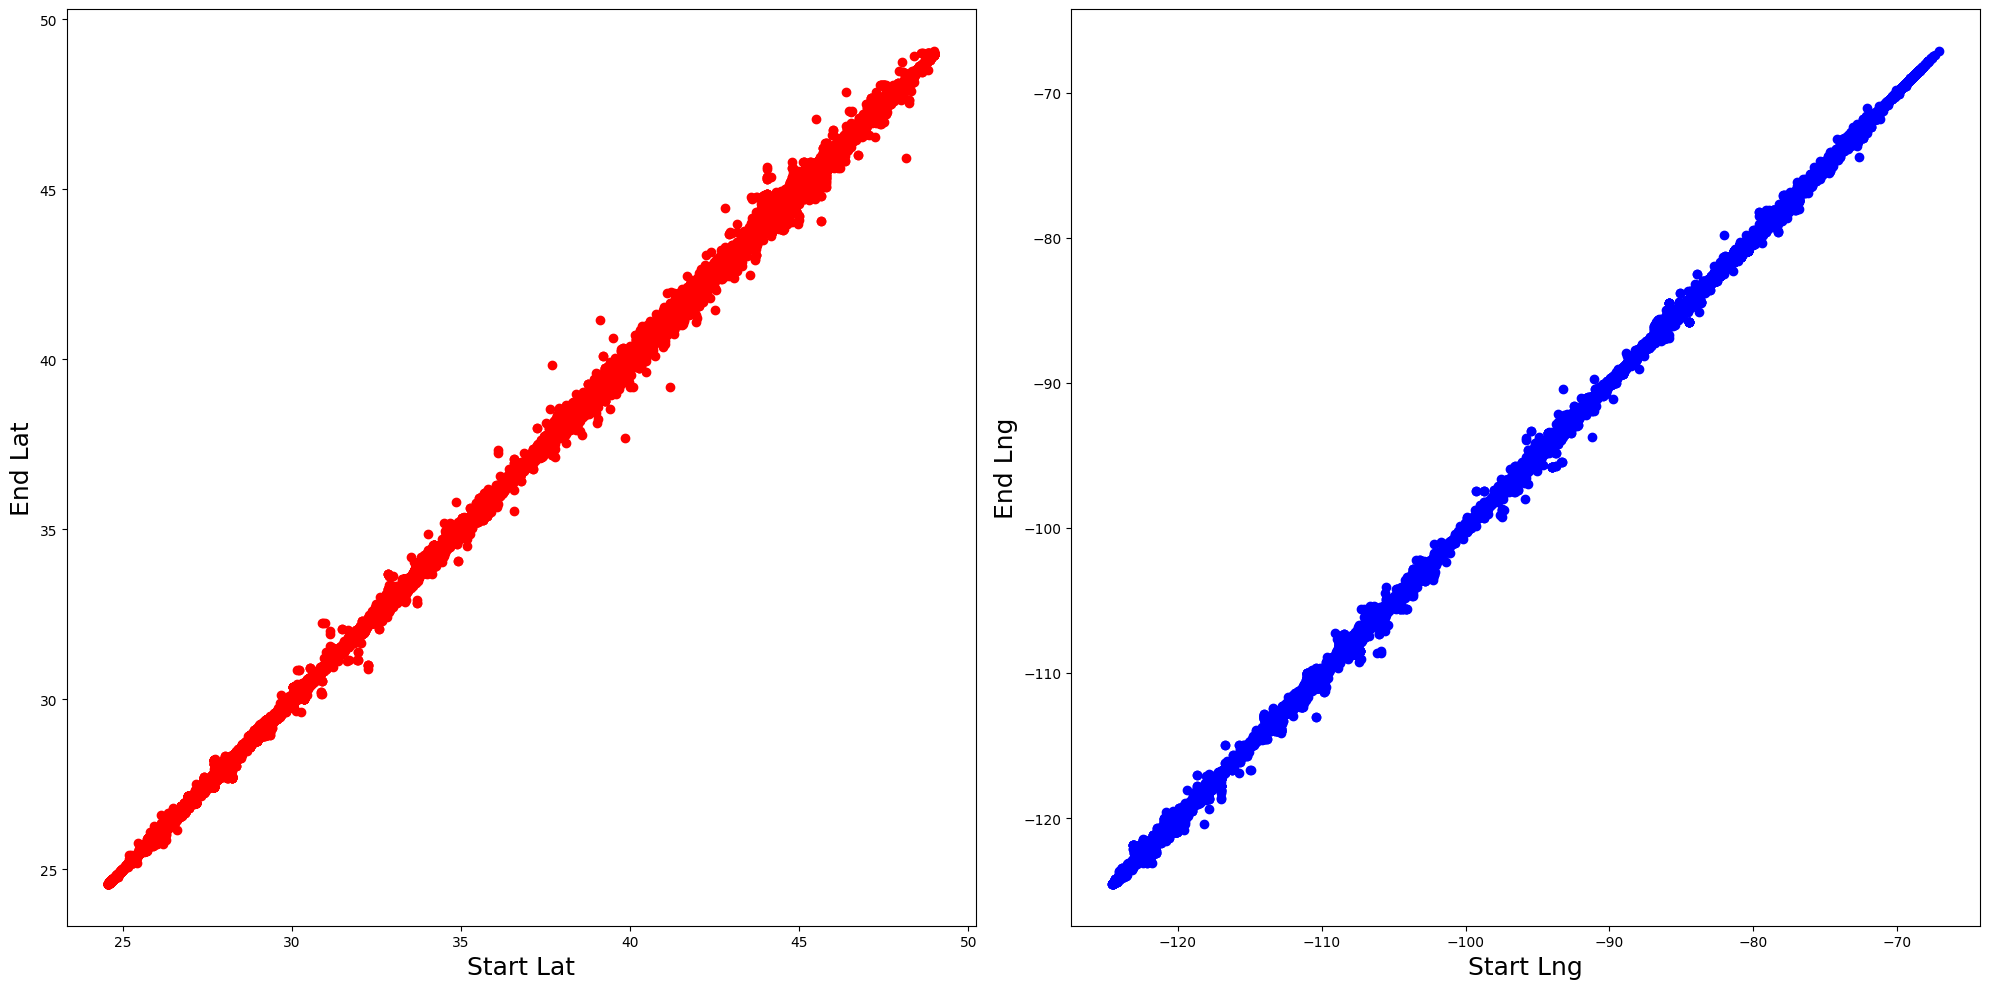

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

df_cor = df[['Start_Lat', 'End_Lat', 'Start_Lng', 'End_Lng']]
df_cor = df_cor.dropna()
fontsize = 18

axes[0].plot(df_cor['Start_Lat'], df_cor['End_Lat'], 'ro', linestyle="None")
axes[0].set_xlabel('Start Lat', fontsize=fontsize)  
axes[0].set_ylabel('End Lat', fontsize=fontsize)  
axes[1].plot(df_cor['Start_Lng'], df_cor['End_Lng'], 'bo', linestyle="None")
axes[1].set_xlabel('Start Lng', fontsize=fontsize) 
axes[1].set_ylabel('End Lng', fontsize=fontsize)  

fig.tight_layout() 

correlation_lat = df['Start_Lat'].corr(df['End_Lat'])
correlation_lng = df['Start_Lng'].corr(df['End_Lng'])

correlation_lat, correlation_lng

In [17]:
def add_column_mean_coordinate(start: pd.Series, end: pd.Series) -> pd.Series:
    fill_end = end.fillna(start)
    new_series = (start + fill_end) / 2
    return new_series
 
df['Lat'] = add_column_mean_coordinate(df['Start_Lat'], df['End_Lat'])
df['Lng'] = add_column_mean_coordinate(df['Start_Lng'], df['End_Lng'])

In [18]:
nan_df = (df.isnull().mean() * 100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)
nan_df.head(10)

,column_name,percentage
7,End_Lat,44.029355
8,End_Lng,44.029355
27,Precipitation(in),28.512858
21,Wind_Chill(F),25.865904
26,Wind_Speed(mph),7.391355
24,Visibility(mi),2.291524
25,Wind_Direction,2.267043
22,Humidity(%),2.253301
28,Weather_Condition,2.244438
20,Temperature(F),2.120143


In [19]:
df.drop(columns=['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng'], inplace=True)

In [29]:
num_df = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
bool_df = df.select_dtypes(exclude=['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'object'])
cat_df = df.select_dtypes(include=['object'])

num_df.columns, bool_df.columns, cat_df.columns

(Index(['Severity', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
        'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
        'Precipitation(in)', 'Lat', 'Lng'],
       dtype='object'),
 Index(['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
        'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
        'Traffic_Signal', 'Turning_Loop'],
       dtype='object'),
 Index(['Start_Time', 'End_Time', 'City', 'County', 'State', 'Timezone',
        'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition',
        'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
        'Astronomical_Twilight'],
       dtype='object'))

Заметим, что булевые признаки, кроме Amenity показывают на то, где произошло ДТП:
"Отбойник", "Перекресток", "Уступка", "Развязка", "Запретный выезд", "Железная дорога", "Кольцевая развязка", "Станция", "Остановка", "Регулировка движения", "Дорожный сигнал", "Поворотная петля"


### Работа с числовыми признаками

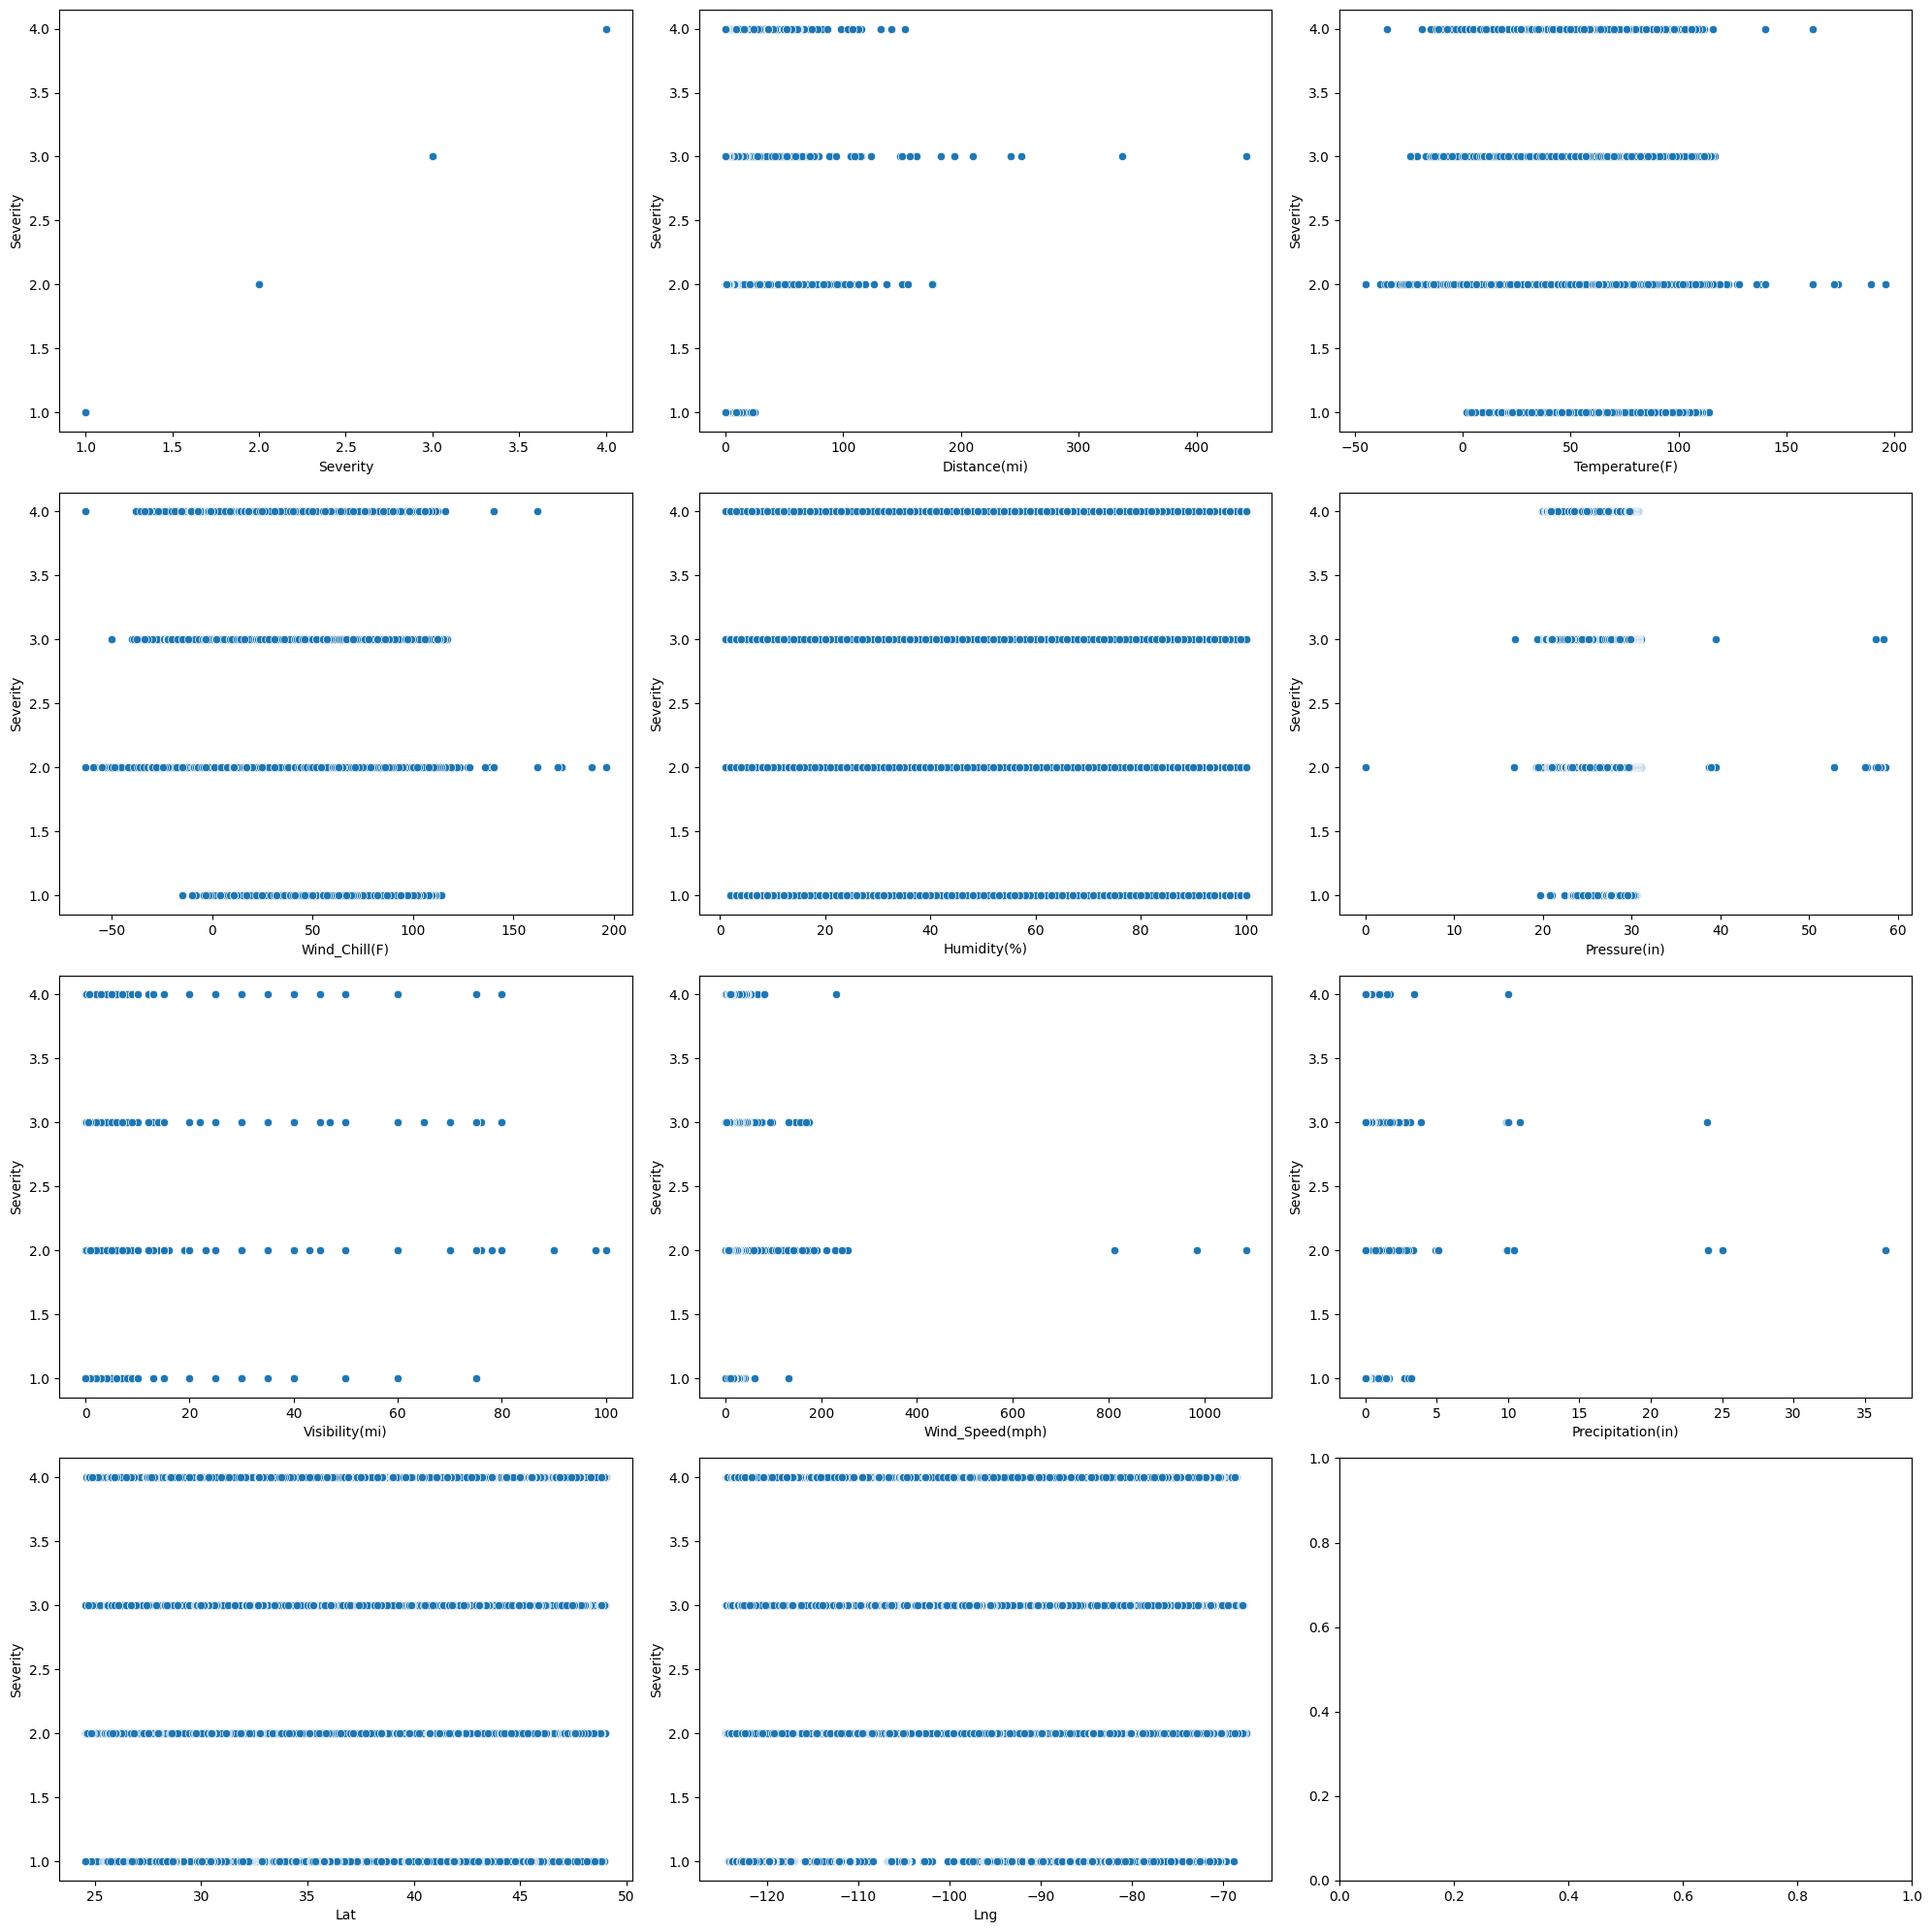

In [15]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes_flattened = axes.reshape(-1)

for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='Severity',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

In [16]:
def corrplot(df_corr, method="pearson", annot=True, **kwargs):
    df_corr = df_corr.dropna()
    matrix_corr = df_corr.corr(method)
    sns.clustermap(
        df_corr.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )
    return matrix_corr

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Lat,Lng
Severity,1.000000,0.029875,-0.025364,-0.028382,0.021326,-0.031243,-0.018976,0.023749,0.015091,0.076677,0.069073
Distance(mi),0.029875,1.000000,-0.054196,-0.058670,0.007317,-0.072740,-0.042702,0.020969,0.004211,0.066109,-0.005485
Temperature(F),-0.025364,-0.054196,1.000000,0.993646,-0.347153,0.151725,0.267810,0.040504,-0.010513,-0.461545,0.015153
Wind_Chill(F),-0.028382,-0.058670,0.993646,1.000000,-0.331021,0.159783,0.274133,-0.014965,-0.010487,-0.465936,0.000651
Humidity(%),0.021326,0.007317,-0.347153,-0.331021,1.000000,0.138624,-0.397733,-0.179229,0.113278,0.017600,0.180802
Pressure(in),-0.031243,-0.072740,0.151725,0.159783,0.138624,1.000000,0.026032,-0.055706,0.006231,-0.254207,0.235483
Visibility(mi),-0.018976,-0.042702,0.267810,0.274133,-0.397733,0.026032,1.000000,0.000785,-0.173400,-0.123436,-0.006117
Wind_Speed(mph),0.023749,0.020969,0.040504,-0.014965,-0.179229,-0.055706,0.000785,1.000000,0.031887,0.028702,0.087563
Precipitation(in),0.015091,0.004211,-0.010513,-0.010487,0.113278,0.006231,-0.173400,0.031887,1.000000,-0.007288,0.029642
Lat,0.076677,0.066109,-0.461545,-0.465936,0.017600,-0.254207,-0.123436,0.028702,-0.007288,1.000000,-0.096840


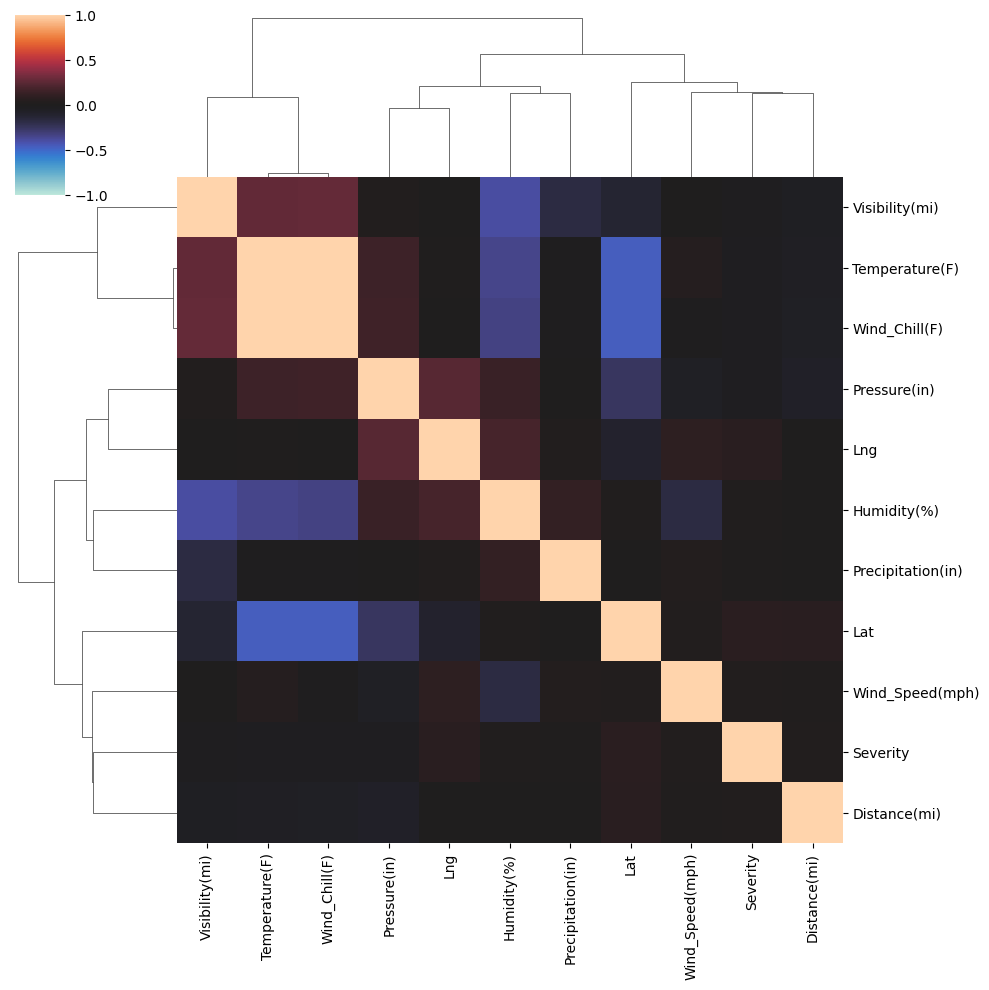

In [17]:
corrplot(num_df, annot=None)

In [21]:
df.drop(columns=['Wind_Chill(F)'], inplace=True)

In [19]:
nan_df = (df.isnull().mean() * 100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)

In [20]:
nan_df.head(10)

,column_name,percentage
22,Precipitation(in),28.512858
21,Wind_Speed(mph),7.391355
19,Visibility(mi),2.291524
20,Wind_Direction,2.267043
17,Humidity(%),2.253301
23,Weather_Condition,2.244438
16,Temperature(F),2.120143
18,Pressure(in),1.820288
15,Weather_Timestamp,1.555666
40,Astronomical_Twilight,0.300787


In [22]:
nan_num_column = ['Wind_Speed(mph)',
                  'Visibility(mi)',
                  'Humidity(%)',
                  'Temperature(F)',
                  'Pressure(in)',
                  'Precipitation(in)'
                  ]

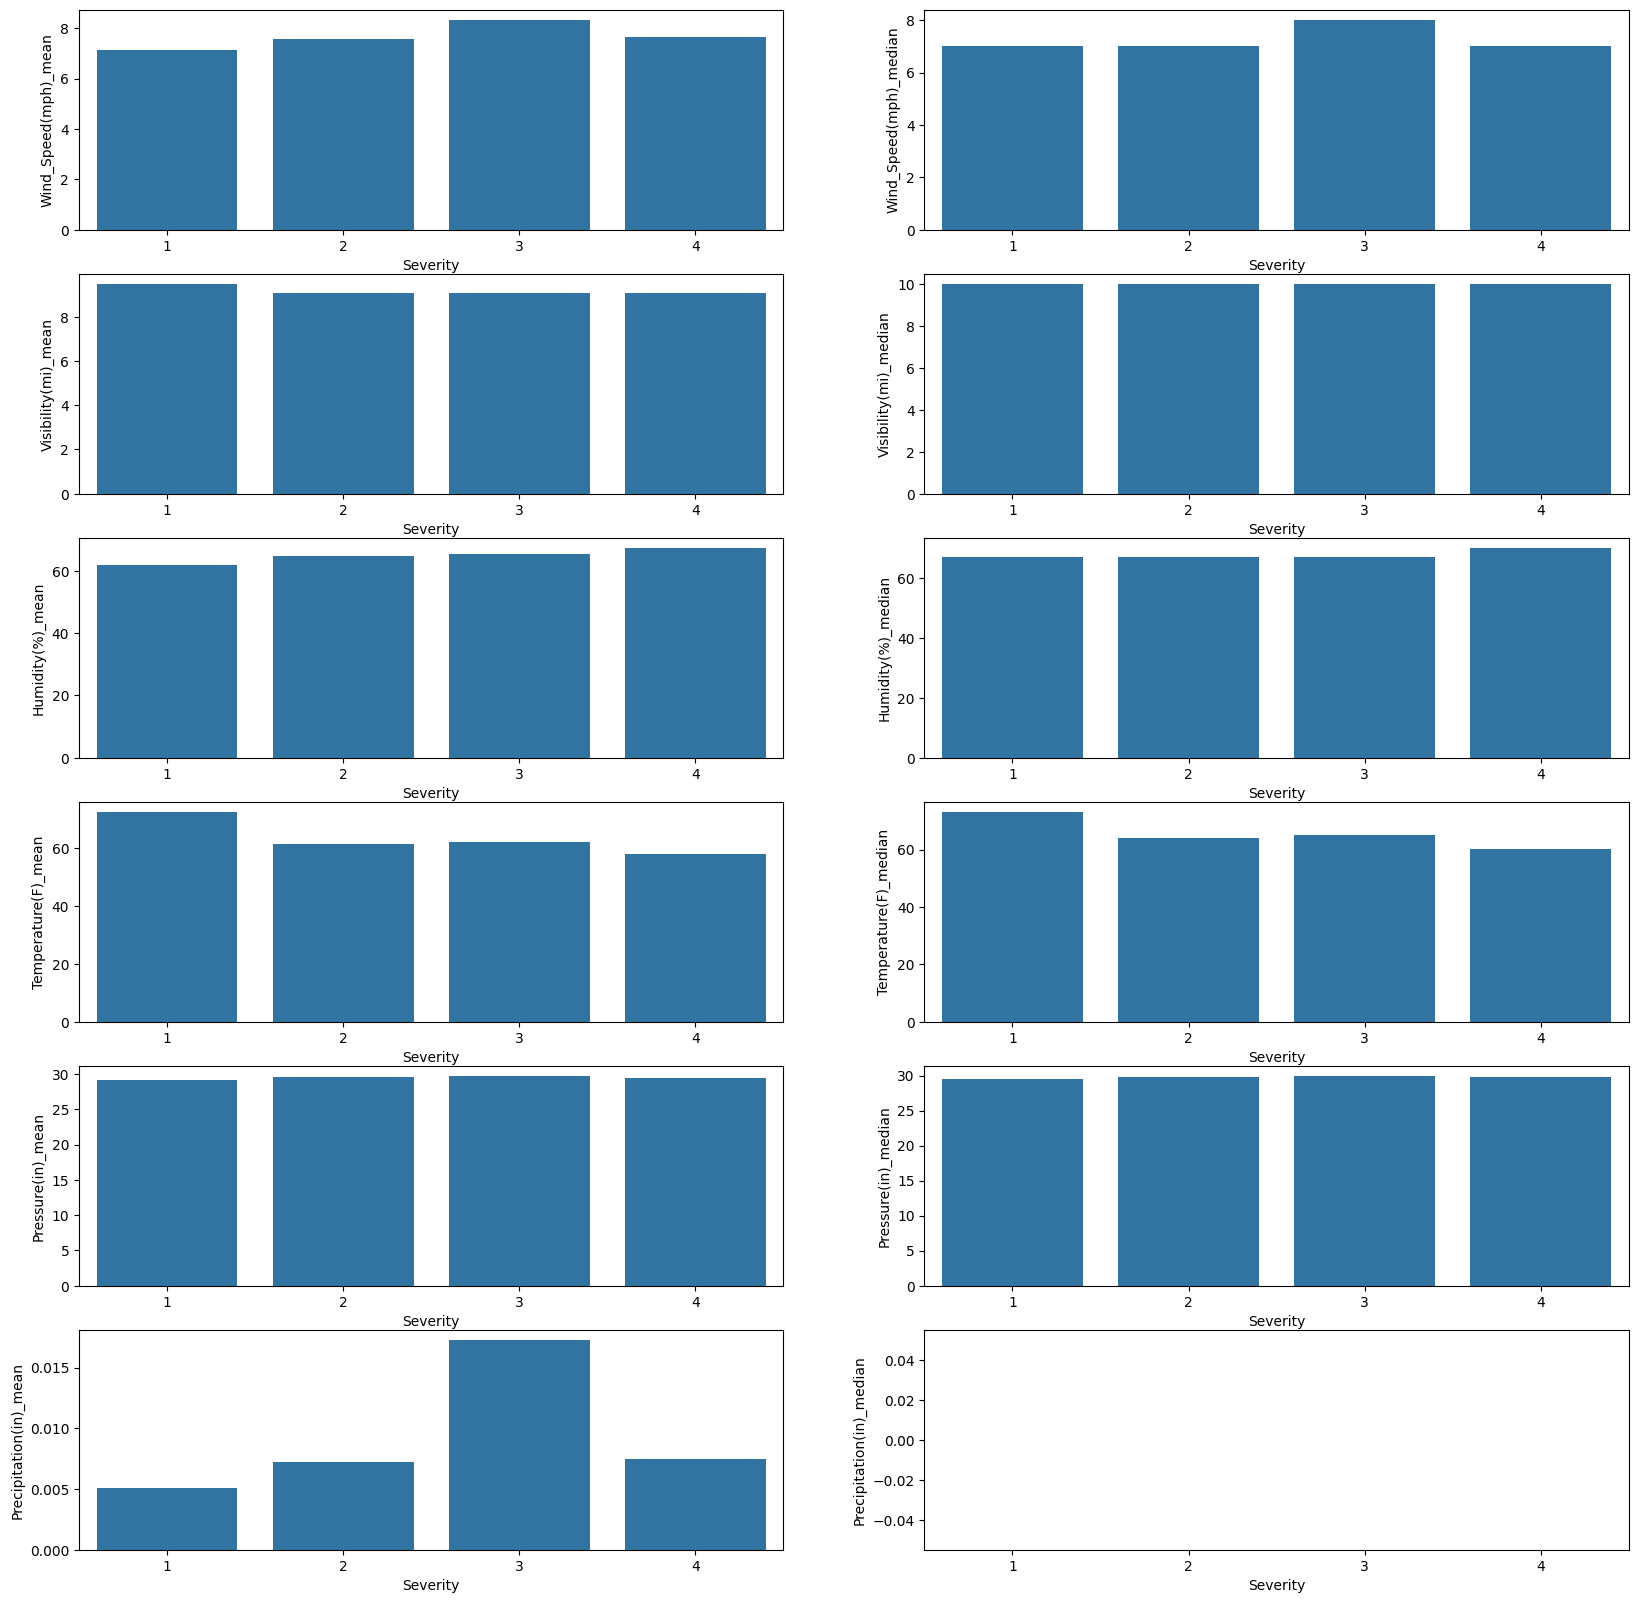

In [22]:
fig, axes = plt.subplots(6, 2, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
Severity_grouped = df.groupby('Severity')
for idx, col_name in enumerate(nan_num_column):
    ax = axes_flattened[idx * 2]
    
    Severity_lot = (
    Severity_grouped[col_name].mean()
    .reset_index(name=f"{col_name}_mean")
    )
    sns.barplot(x='Severity',
                y=f"{col_name}_mean",
                data=Severity_lot, ax=ax)
    
    ax = axes_flattened[idx * 2 + 1]
    
    Severity_lot = (
    Severity_grouped[col_name].median()
    .reset_index(name=f"{col_name}_median")
    )
    sns.barplot(x='Severity',
                y=f"{col_name}_median",
                data=Severity_lot, ax=ax)
    
plt.show()

In [23]:
for col_name in nan_num_column:
    df[col_name] = df.groupby('Severity')[col_name].transform(lambda x: x.fillna(x.mean()))

# Удаление столбцов с почти одними и теми же значениями

In [24]:
def get_almost_constant_columns(df: pd.DataFrame, dropna=True, limit: int = 96):
    cols = []
    for i in df:
        if dropna:
            counts = df[i].dropna().value_counts()
        else:
            counts = df[i].value_counts()
        most_popular_value_count = counts.iloc[0]
        if (most_popular_value_count / len(df)) * 100 - limit > 0:
            cols.append(i)
    return cols


In [25]:
overfit_cat = get_almost_constant_columns(cat_df, limit=96)
overfit_cat

['Country']

In [24]:
df.drop(columns=["Country"], inplace=True)

In [27]:
overfit_num = get_almost_constant_columns(num_df, dropna=True, limit=96)
overfit_num

[]

In [28]:
overfit_bool = get_almost_constant_columns(bool_df, dropna=True, limit=96)
overfit_bool

['Amenity',
 'Bump',
 'Give_Way',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Turning_Loop']

# Удаление выбросов

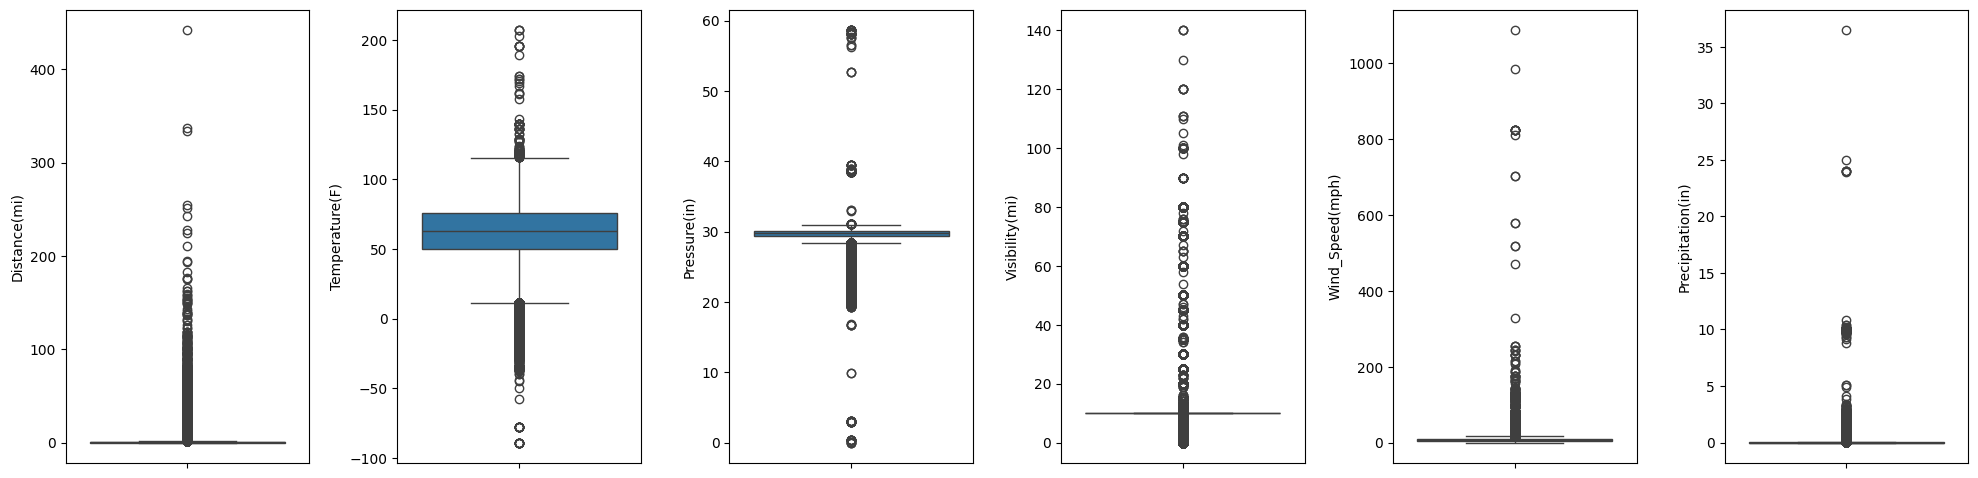

In [29]:
out_col = ["Distance(mi)", "Temperature(F)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]

fig, axes = plt.subplots(1, 6, figsize=(20, 5))
for ax, col in zip(axes, out_col):
    sns.boxplot(y=df[col], data=df, ax=ax)
fig.tight_layout(pad=1.5)

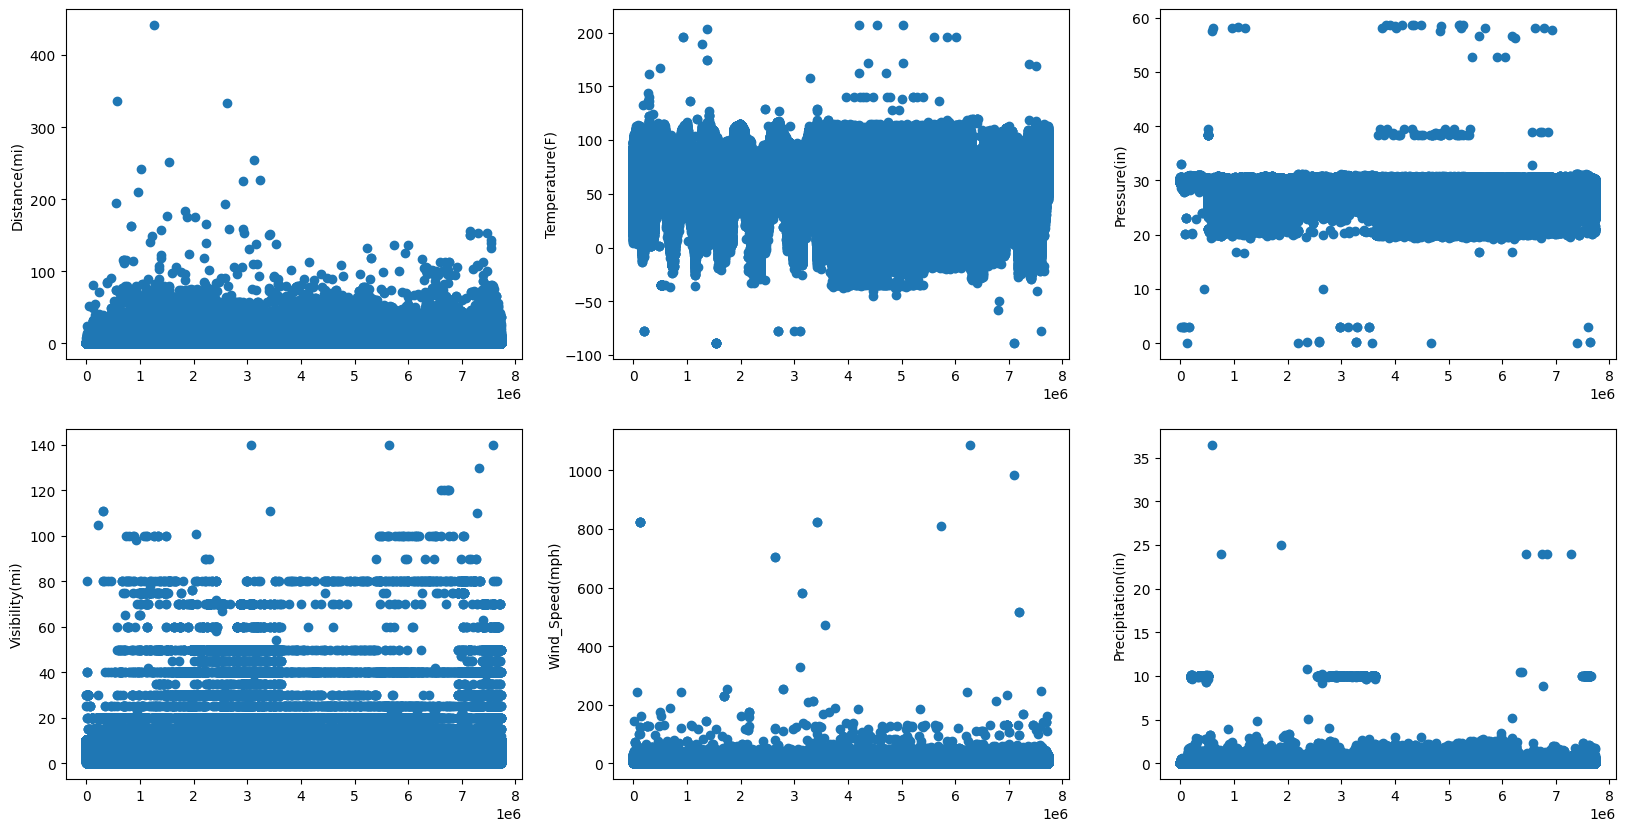

In [30]:
out_col = ["Distance(mi)", "Temperature(F)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes_flattened = axes.flatten()

for index, column in enumerate(out_col):
    axes[index // 3][index % 3].plot(
        [i + 1 for i in range(len(df[column]))],
        df[column],
        marker='o',
        linestyle=''
    )
    axes[index // 3][index % 3].set_ylabel(column)

In [52]:
for col, upper_bound, down_bound in (
    ('Distance(mi)', 100, -100),
    ('Temperature(F)', 125, -40),
    ('Pressure(in)', 32, 18),
    ('Visibility(mi)', 85, -85),
    ('Wind_Speed(mph)', 100, -100),
    ("Precipitation(in)",10, -15),
):
    df = df.drop(df[df[col] > upper_bound].index)
    df = df.drop(df[df[col] < down_bound].index)

# Работа с категориальными признаками

In [31]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed').dt.round("S")
df['End_Time'] = pd.to_datetime(df['End_Time'], format='mixed').dt.round("S")
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], format='mixed').dt.round("S")

<BarContainer object of 2 artists>

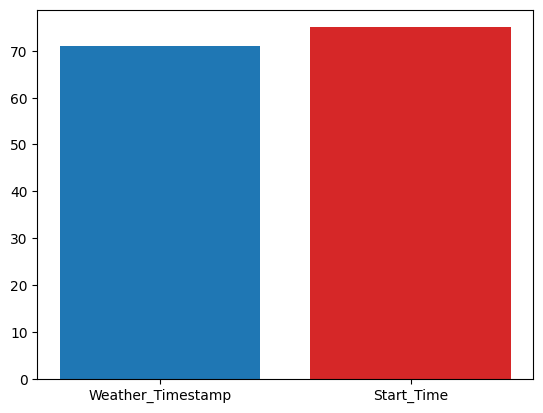

In [32]:
delta_Weather_Timestamp = round((df['End_Time'] - df['Weather_Timestamp']).dt.total_seconds() / 60)
delta_Start_Time = round((df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60)
plt.bar(['Weather_Timestamp', 'Start_Time'], [delta_Weather_Timestamp.median(), delta_Start_Time.median()], color=['tab:blue', 'tab:red'])

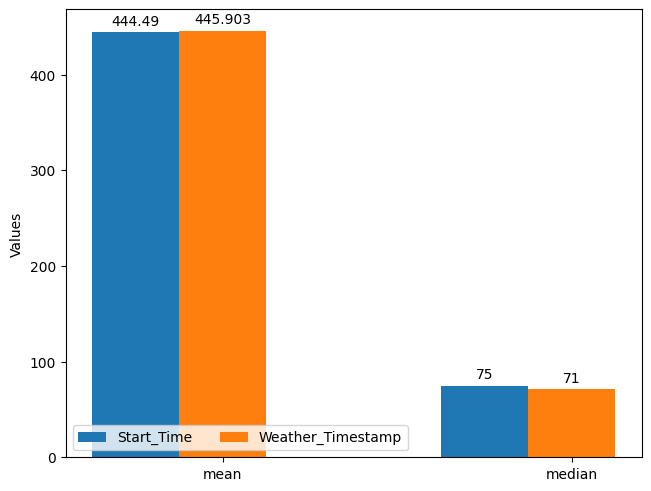

In [55]:
value_types = ("mean", "median")
attributes = ('Start_Time', 'Weather_Timestamp')

value_times = dict.fromkeys(attributes, None)

for attribute in attributes:
    delta_Weather_Timestamp = round((df['End_Time'] - df['Weather_Timestamp']).dt.total_seconds() / 60)
    delta = round((df['End_Time'] - df[attribute]).dt.total_seconds() / 60)
    value_times[attribute] = (delta.mean(), delta.median())
    
x = np.arange(len(value_types))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in value_times.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel('Values')
ax.set_xticks(x + width, value_types)
ax.legend(loc='lower left', ncols=2)

plt.show()

In [33]:
df.loc[df['Weather_Timestamp'].isna(), 'Weather_Timestamp'] = df['Start_Time'].loc[df['Weather_Timestamp'].isna()]

In [34]:
df['Start_Date_Year'] = df['Start_Time'].dt.year
df['Start_Date_Month'] = df['Start_Time'].dt.month
df['Start_Date_Day'] = df['Start_Time'].dt.day
df['Start_Date_Hour'] = df['Start_Time'].dt.hour

df['End_Date_Year'] = df['End_Time'].dt.year
df['End_Date_Month'] = df['End_Time'].dt.month
df['End_Date_Day'] = df['End_Time'].dt.day
df['End_Date_Hour'] = df['End_Time'].dt.hour

df['Weather_Datestamp_Year'] = df['Weather_Timestamp'].dt.year
df['Weather_Datestamp_Month'] = df['Weather_Timestamp'].dt.month
df['Weather_Datestamp_Day'] = df['Weather_Timestamp'].dt.day
df['Weather_Datestamp_Hour'] = df['Weather_Timestamp'].dt.hour

In [35]:
df['Time_Difference'] = round((df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60)

In [36]:
df.drop(columns=['Weather_Timestamp', 'Start_Time', 'End_Time'], inplace=True)

In [37]:
new_Twilight_names = {
    'Sunrise_Sunset': 'Is_Day',
    "Civil_Twilight": "Is_Civil_Day",
    "Nautical_Twilight": "Is_Twilight_Day",
    "Astronomical_Twilight": "Is_Astronomical_Day"
}
for column in new_Twilight_names.keys():
    df[new_Twilight_names[column]] = df[column].map({'Day': 1.0, 'Night': 0.0}).astype(float)
df.drop(columns=list(new_Twilight_names.keys()), inplace=True)


In [38]:
cat_df = df.select_dtypes(include=['object'])

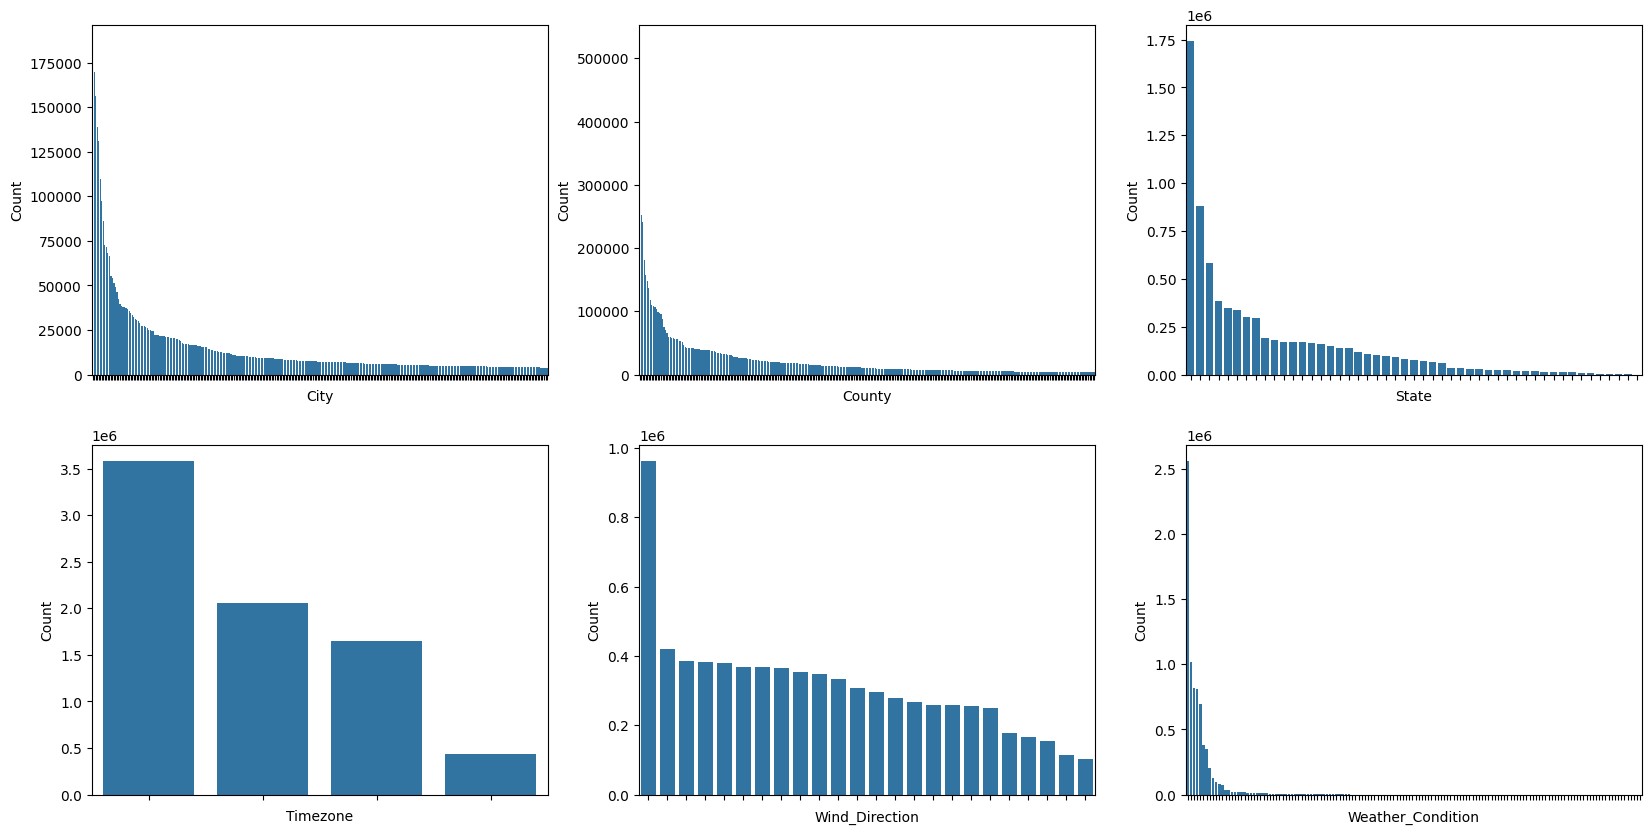

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes_flattened = axes.reshape(-1)
count = 300

for idx, column in enumerate(cat_df.columns):
    ax = axes_flattened[idx]
    value_counts = df[column].value_counts()
    viz_df = pd.DataFrame({column: value_counts.index[:count], 'Count': value_counts.values[:count]})
    sns.barplot(
        x=column,
        y='Count',
        data=viz_df.dropna(),
        ax=ax
        )
    
    ax.set_xticklabels([])
    

In [64]:
df['Timezone'] = df['Timezone'].replace({
    "US/Eastern": "Easterm",
    "US/Central": "Central",
    "US/Pacific": "Pacific",
    "US/Mountain": "Mountain"
})

In [ ]:
nan_df = (df.isnull().mean() * 100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)
nan_df.head(10)

,column_name,percentage
11,Wind_Direction,2.267157
14,Weather_Condition,2.244344
46,Is_Astronomical_Day,0.300731
45,Is_Twilight_Day,0.300731
44,Is_Civil_Day,0.300731
43,Is_Day,0.300731
2,Street,0.140622
6,Timezone,0.101037
3,City,0.003274
31,Start_Date_Month,0.000000


In [40]:
df['Weather_Condition'] = df['Weather_Condition'].replace({"N/A": np.nan})

In [42]:
replacement_words = {
    "Ash": "Ash",
    "Browing": "Browing",
    "Cloud": "Cloudy",
    "Clouds": "Cloudy",
    "Cloudy": "Cloudy",
    "Drizzle": "Rain",
    "Dust": "Dust",
    "Duststorm": "Duststorm",
    "Fair": "Fair",
    "Fog": "Fog",
    "Freezing": "Freezing",
    "Funnel": "Cloudy",
    "Grains": "Hail",
    "Hail": "Hail",
    "Haze": "Fog",
    "Ice": "Ice",
    "Mist": "Fog",
    "Mix": "Mix",
    "Overcast": "Cloudy",
    "Rain": "Rain",
    "Sand": "Dust",
    "Shower": "Rain",
    "Showers": "Rain",
    "Sleet": "Snow",
    "Smoke": "Ash",
    "Snow": "Snow",
    "Squalls": "Squalls",
    "T-Storm": "Tornado",
    "Whirls": "Whirls",
    "Whirlwinds": "Whirls",
    "Windy": "Windy",
    "Wintry": "Snow",
    "Clear": "Clear",
    "Thunder": "Thunder",
    "Thunderstorm": "Thunder",
    "Thunderstorms": "Thunder",
}

In [43]:
Processed_Weather_Condition = df.dropna()['Weather_Condition'].apply(
    lambda x: ' '.join(
        set(
            sorted(
                    [
                    replacement_words[word] for word in x.split(" ") if word in replacement_words.keys()
                    ]
                )
            )
        ) 
    )
for index in Processed_Weather_Condition.index:
    if 'Mix' in Processed_Weather_Condition[index]:
        Processed_Weather_Condition[index] = 'Mix'
        
df['Weather_Condition'] = Processed_Weather_Condition.replace({'': np.nan})

In [45]:
df['Weather_Condition'] = df.groupby('Severity')['Weather_Condition'].transform(lambda x: x.fillna(x.mode()[0]))

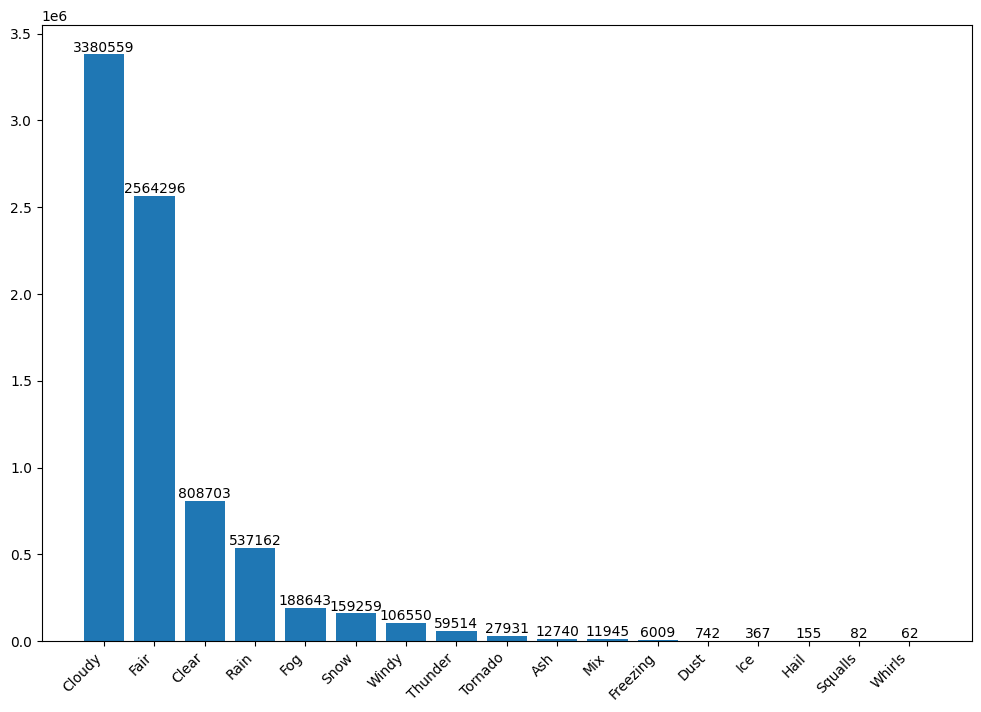

In [48]:
words = set()
repeat_counts = dict()
for line in df['Weather_Condition']:
    for word in line.split(" "):
        if word in words:
            repeat_counts[word] += 1
        else:
            words.add(word)
            repeat_counts[word] = 1     
            
N = 100
sorted_words = sorted(repeat_counts, key=repeat_counts.get, reverse=True)[:N]
sorted_counts = [repeat_counts[word] for word in sorted_words]

plt.figure(figsize=(12, 8))

plt.bar(sorted_words, sorted_counts)

plt.xticks(rotation=45, ha='right')

for idx, count in enumerate(sorted_counts):
    plt.text(idx, count, str(count), ha='center', va='bottom')

plt.show()


In [72]:
new_columns = np.zeros((len(words), len(df)), dtype=float)

for i, line in enumerate(df['Weather_Condition']):
    line_words = set(line.split(" "))
    for k, word in enumerate(words):
        if word in line_words:
            new_columns[k][i] = 1.0
            
for idx, word in enumerate(words):
    new_column = pd.Series(new_columns[idx])
    new_column.index = df.index
    df[word] = new_column
    

In [73]:
df.drop(columns=['Weather_Condition'], inplace=True)

In [74]:
df['Wind_Direction'] = df['Wind_Direction'].replace({
    'South': 'S',
    'West': 'W',
    'North': 'N',
    'Variable': 'VAR',
    'East': 'E',
    'Calm': 'CALM'
    })

In [75]:
df['Wind_Direction'].fillna('VAR', inplace=True)

Причины удаления признака Street:
1) есть Штат, Округ, Координаты. Для нашей задачи этого достаточно
2) На необработанных слишком много классов
3) Слишком проблемно обрабатывать

In [25]:
df.drop(columns=['Street'], inplace=True)

In [77]:
df.dropna(inplace=True)

In [81]:
onehot_encoder = OneHotEncoder(sparse_output=False, min_frequency=5*10**(-4), handle_unknown="ignore")

encoded_categorical_columns = pd.DataFrame(onehot_encoder.fit_transform(df[['Timezone', 'Wind_Direction']]))

encoded_categorical_columns.columns = onehot_encoder.get_feature_names_out()
encoded_categorical_columns.index = df.index

for column_name in onehot_encoder.get_feature_names_out():
    df[column_name] = encoded_categorical_columns[column_name]

In [82]:
df.drop(columns=['Timezone', 'Wind_Direction'], inplace=True)

In [83]:
count_encoder_city = ce.CountEncoder(normalize=True)
df['City_Encoded'] = count_encoder_city.fit_transform(df['City'])

count_encoder_county = ce.CountEncoder(normalize=True)
df['County_Encoded'] = count_encoder_city.fit_transform(df['County'])

In [84]:
df.drop(columns=['County', 'City'], inplace=True)

In [85]:
label_encoder_state = LabelEncoder()
encoded = pd.Series(label_encoder_state.fit_transform(df['State']))
encoded.index = df.index
df['State_Encoded'] = encoded

In [86]:
df.drop(columns=['State'], inplace=True)

# Работа с булевыми признаками

In [89]:
bool_df = df.select_dtypes(exclude=['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'object'])

In [90]:
for column in bool_df.columns:
    df[column] = df[column].map({True: 1.0, False: 0.0}).astype(float)

# Общий просмотр всех признаков

In [94]:
def seach_bad_columns(df: pd.DataFrame) -> list:
    unchanged_columns = []

    for column in df.columns:
        # Проверяем, есть ли дубликаты в столбце
        if df[column].duplicated()[1:].all():
            unchanged_columns.append(column)
            
    return unchanged_columns

bad_columns = seach_bad_columns(df)

['Turning_Loop']

In [95]:
df.drop(columns = bad_columns, inplace=True)

In [96]:
df.columns

Index(['Severity', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Lat', 'Lng', 'Start_Date_Year',
       'Start_Date_Month', 'Start_Date_Day', 'Start_Date_Hour',
       'End_Date_Year', 'End_Date_Month', 'End_Date_Day', 'End_Date_Hour',
       'Weather_Datestamp_Year', 'Weather_Datestamp_Month',
       'Weather_Datestamp_Day', 'Weather_Datestamp_Hour', 'Time_Difference',
       'Is_Day', 'Is_Civil_Day', 'Is_Twilight_Day', 'Is_Astronomical_Day',
       'Ash', 'Windy', 'Hail', 'Squalls', 'Fog', 'Dust', 'Thunder', 'Mix',
       'Whirls', 'Ice', 'Freezing', 'Clear', 'Fair', 'Tornado', 'Cloudy',
       'Snow', 'Rain', 'Timezone_Central', 'Timezone_Easterm',
       'Timezone_Mountain', 'Timezone_Pacific', 'Wind_Direction_CALM',
       'Wind_Dir

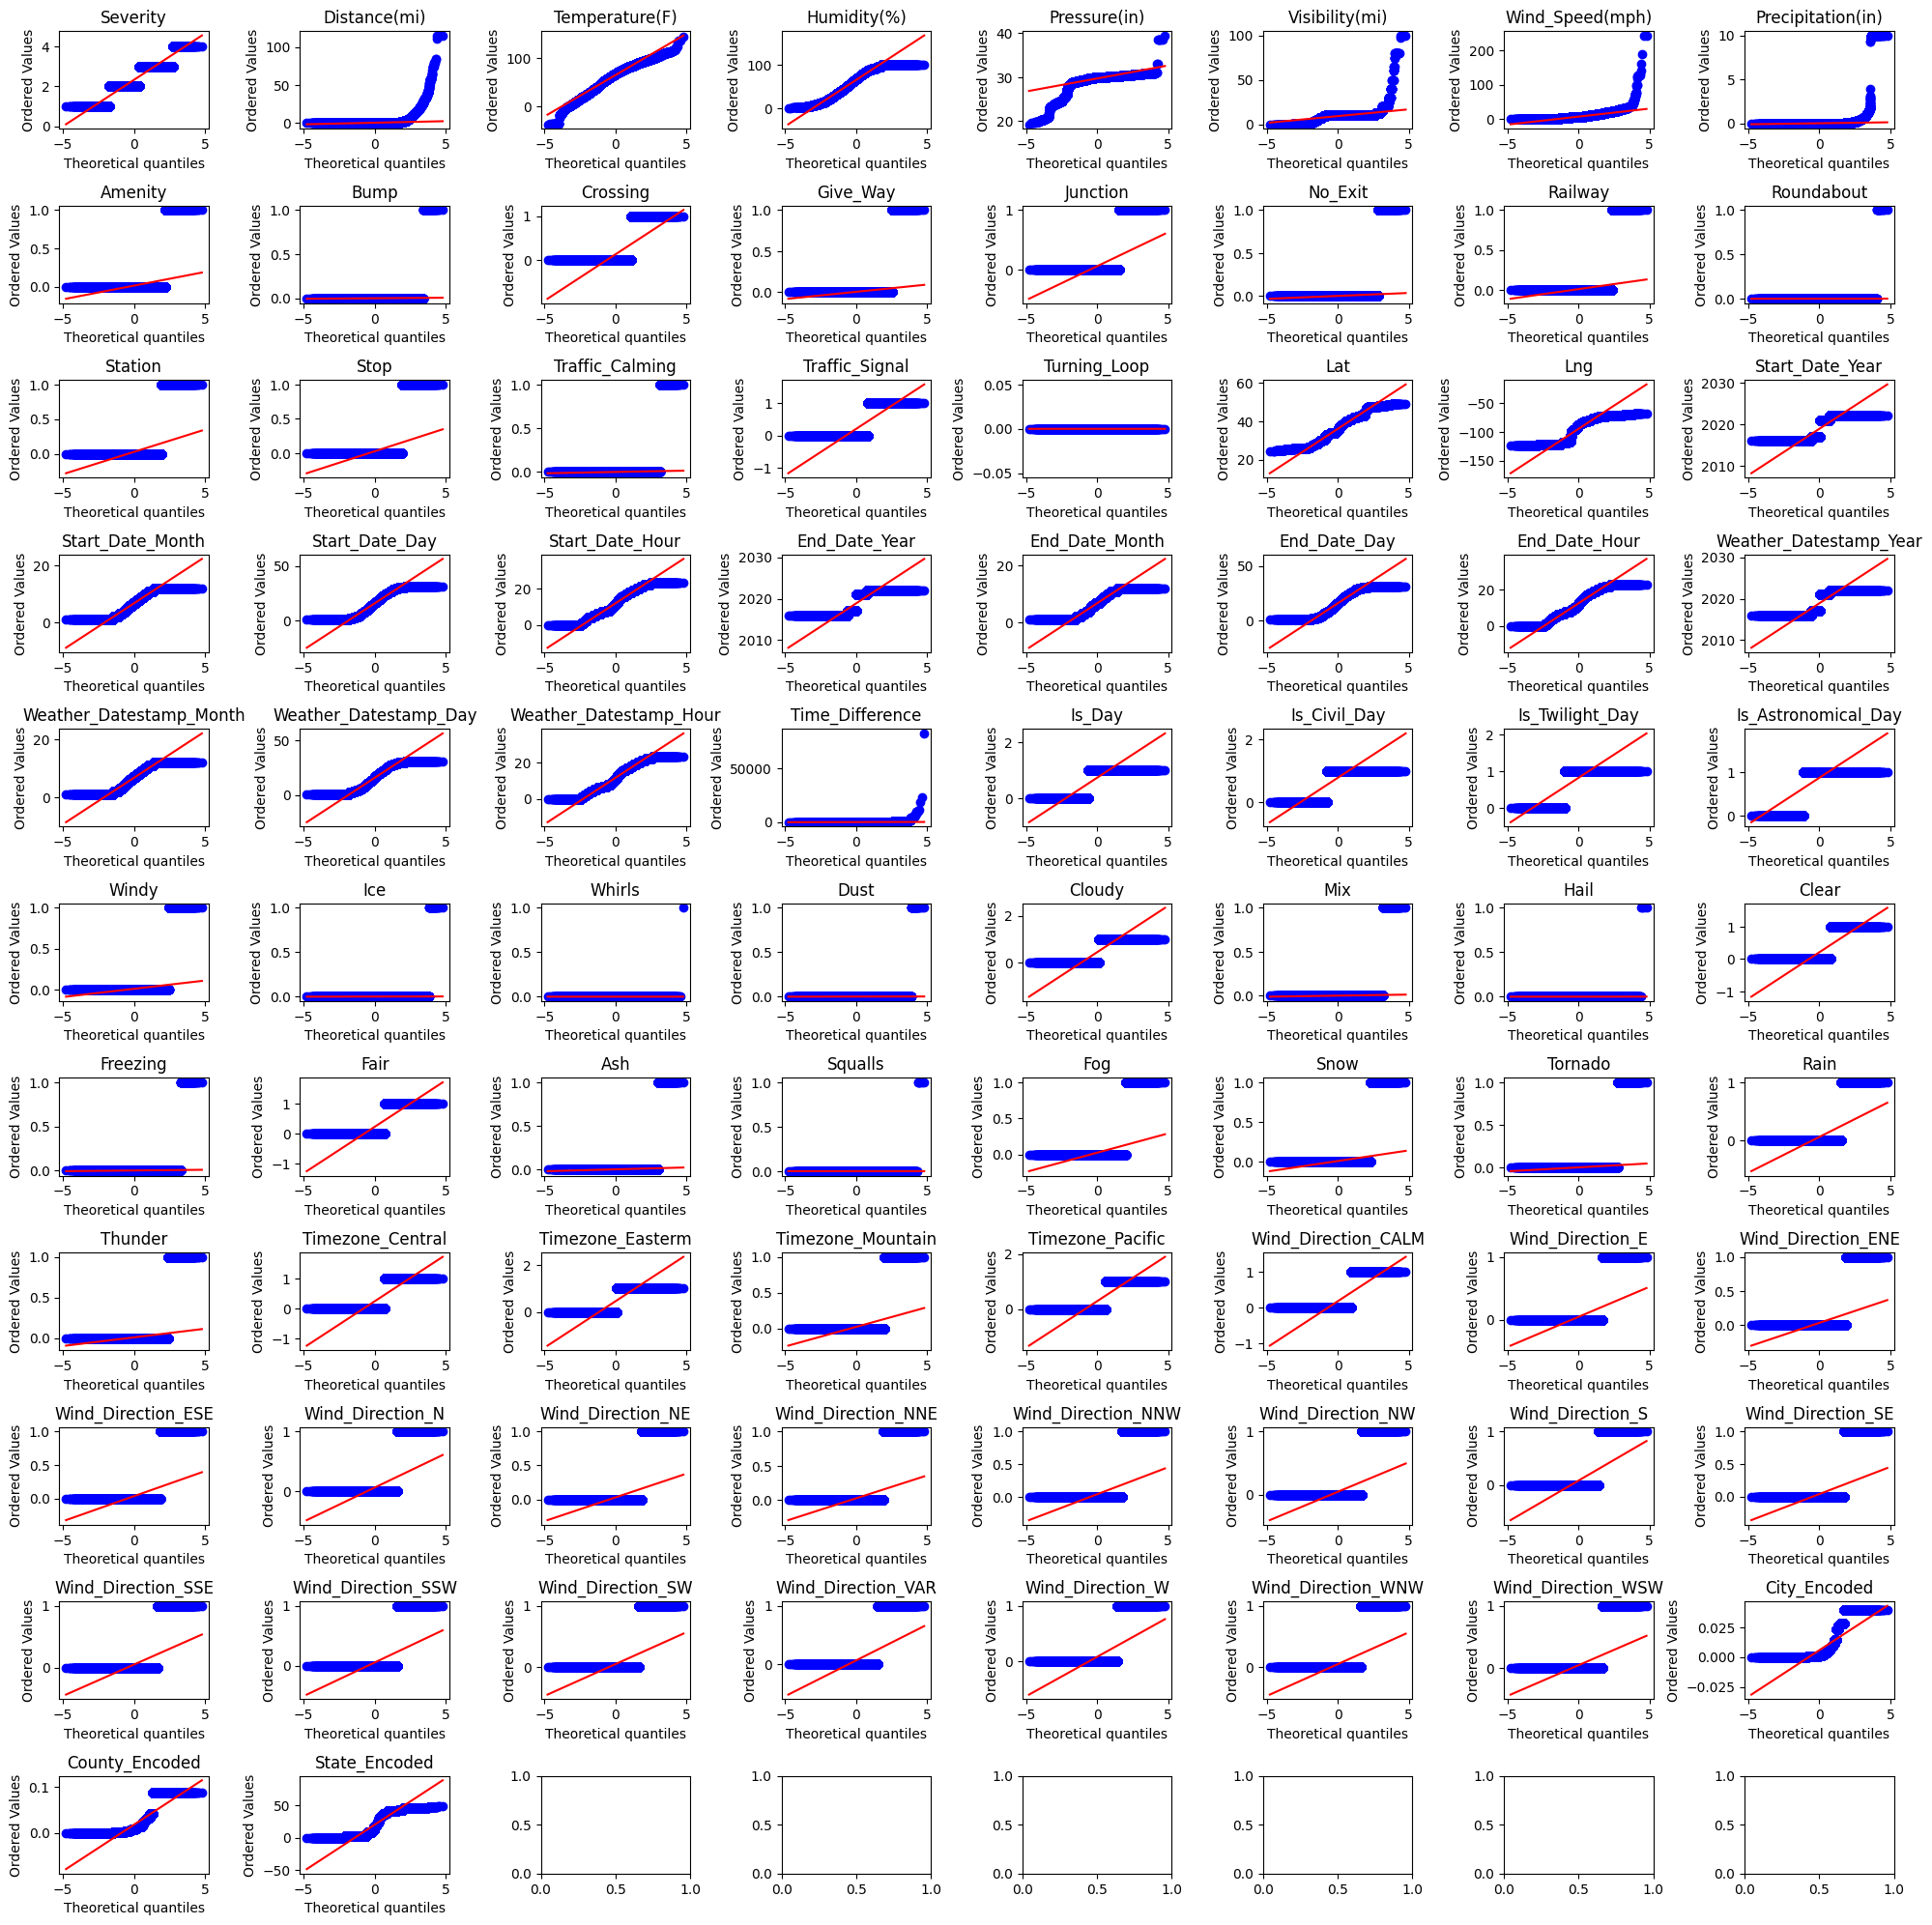

In [ ]:
fig, axes = plt.subplots(11, 8, figsize=(20, 20))
axes_flattened = axes.reshape(-1)

for idx, col_name in enumerate(df.columns):
    ax = axes_flattened[idx]
    stats.probplot(df[col_name][:10**5], dist="norm", plot=ax)
    ax.set_title(col_name)
    
fig.tight_layout(pad=1.0)

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,...,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_VAR,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,City_Encoded,County_Encoded,State_Encoded
Severity,1.000000,0.035367,-0.020564,0.022725,0.043223,-0.003476,0.043752,0.032433,-0.032977,-0.005159,...,0.002852,0.004915,0.003184,-0.007459,0.004970,0.002522,0.002081,-0.054800,-0.030598,0.021600
Distance(mi),0.035367,1.000000,-0.055255,0.009050,-0.095109,-0.038929,0.009017,-0.001887,-0.028513,-0.004119,...,-0.006530,-0.001095,0.001010,0.007665,0.005433,0.004508,0.004473,-0.084372,-0.046435,0.005013
Temperature(F),-0.020564,-0.055255,1.000000,-0.330987,0.108852,0.216587,0.033648,-0.003662,0.005348,0.003506,...,0.046731,0.060127,0.047846,0.079215,-0.011031,-0.047656,0.030627,0.201053,0.177049,-0.127851
Humidity(%),0.022725,0.009050,-0.330987,1.000000,0.115386,-0.382790,-0.170732,0.070179,-0.007168,-0.006106,...,0.025335,-0.014585,-0.027576,-0.086276,-0.079922,-0.074342,-0.049171,-0.006915,-0.100402,0.099155
Pressure(in),0.043223,-0.095109,0.108852,0.115386,1.000000,0.038033,-0.022223,0.017853,0.020263,-0.005609,...,-0.011843,-0.010126,-0.018216,-0.000966,-0.021546,-0.006728,-0.025566,0.137901,0.118965,-0.022500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wind_Direction_WNW,0.002522,0.004508,-0.047656,-0.074342,-0.006728,0.027180,0.106139,-0.006253,0.000093,0.001504,...,-0.049437,-0.052033,-0.050568,-0.061674,-0.062844,1.000000,-0.049785,-0.046156,-0.039554,-0.022941
Wind_Direction_WSW,0.002081,0.004473,0.030627,-0.049171,-0.025566,0.022796,0.061188,-0.002068,-0.002277,-0.000535,...,-0.047696,-0.050201,-0.048787,-0.059502,-0.060631,-0.049785,1.000000,-0.017599,0.027659,-0.028408
City_Encoded,-0.054800,-0.084372,0.201053,-0.006915,0.137901,0.045792,0.018777,0.002338,0.033529,0.007412,...,0.030929,-0.019546,-0.020190,0.009525,-0.036765,-0.046156,-0.017599,1.000000,0.409721,0.037631
County_Encoded,-0.030598,-0.046435,0.177049,-0.100402,0.118965,0.037204,-0.077976,-0.007681,0.000104,0.001501,...,-0.012517,-0.003221,-0.005730,0.047836,0.016977,-0.039554,0.027659,0.409721,1.000000,-0.330233


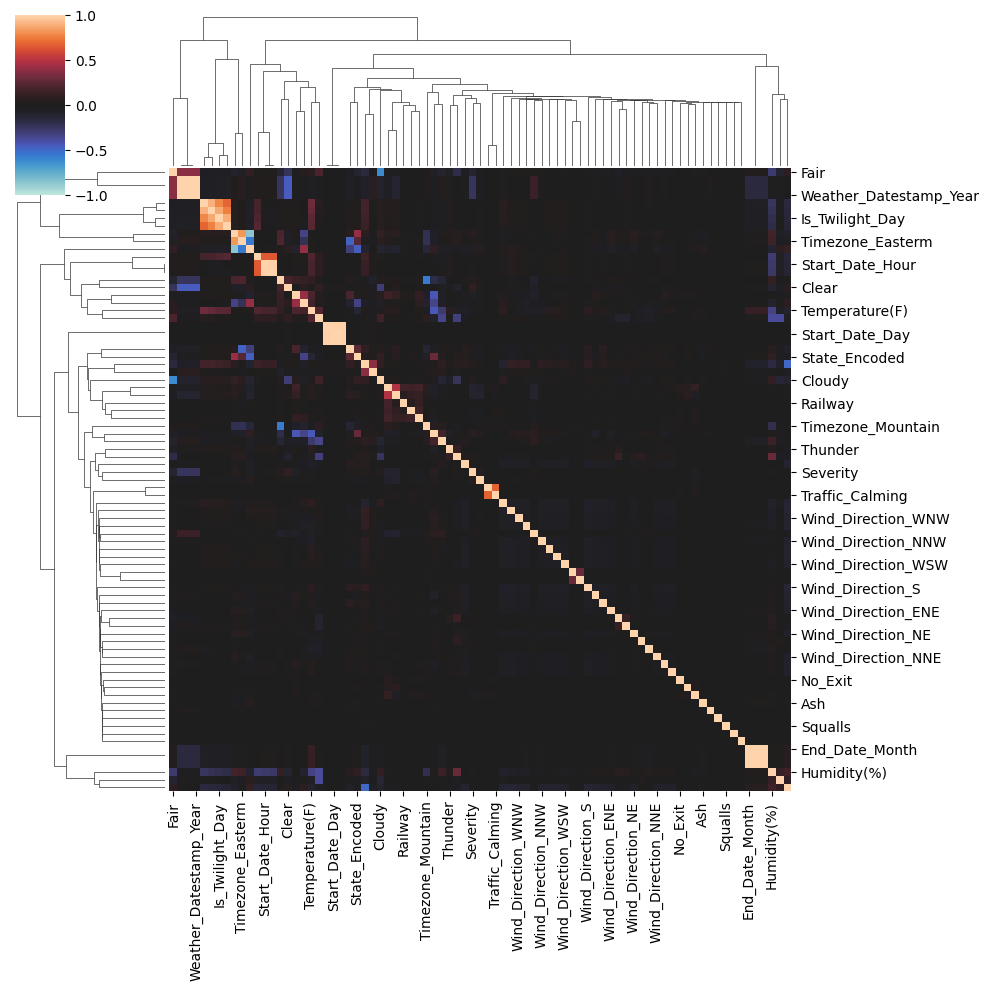

In [97]:
corrplot(df, annot=None)

### Вывод
При выполнении анализа датасета:
1) Были получены алгоритмы и способы учистки данных для дальнейшего обучения моделей
2) Добавлены новые признаки, которые могут быть полезны при обучении модели
3) Рассмотрено и показано распределение данных
4) Рассмотрены зависимости между признаками и показано, что некоторые категории имеют корреляцию. Однако, исходя, из того, какие столбцы коррелируют, эта величина не указывает на наличие проблемы.